In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# use LaTeX fonts in the plot
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

In [3]:
def plot_calibration_data(data, data2):
    fig, ax = plt.subplots()
    
    xs = [i for i in range(1, len(data) + 1)]
    
    ax.plot(xs, data)
    ax.plot(xs, data2)
    
    plt.show()

def plot_distances(data):
    fig, ax = plt.subplots(figsize=(10,10))
    
    xs = [i for i in range(1, len(data) + 1)]
    
    ax.plot(xs, xs)
    ax.plot(xs, data)
    
    plt.show()

In [4]:
eight_bits = [457, 541, 692, 784, 859, 868, 868, 833, 762, 704, 652, 616, 570, 530, 505, 470, 453, 427, 413, 400, 389, 369, 357, 347, 338, 332, 319, 312, 303, 296]
eight_bits2 = [291, 286, 280, 274, 268, 261, 257, 253, 248, 245, 242, 238, 236, 234, 231, 228, 225, 222, 220, 217, 214, 212, 210, 207, 206, 205, 204, 202, 200, 198]
final_eight_bits = eight_bits + eight_bits2
# [280, 261, 248, 238, 231, 222, 214, 207, 204, 198]

voltages = 0.0048 * np.array(final_eight_bits)

distances = ((voltages / 12.494) ** (1 / -0.616))
distances2 = ((voltages / 22) ** (1 / -0.8))
new_calibration = ((voltages**1.38 / 20) ** (1 / -0.78)) + 5

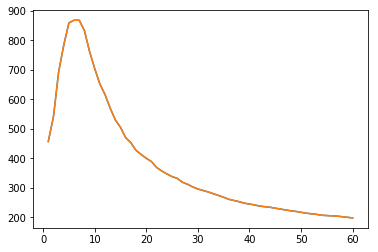

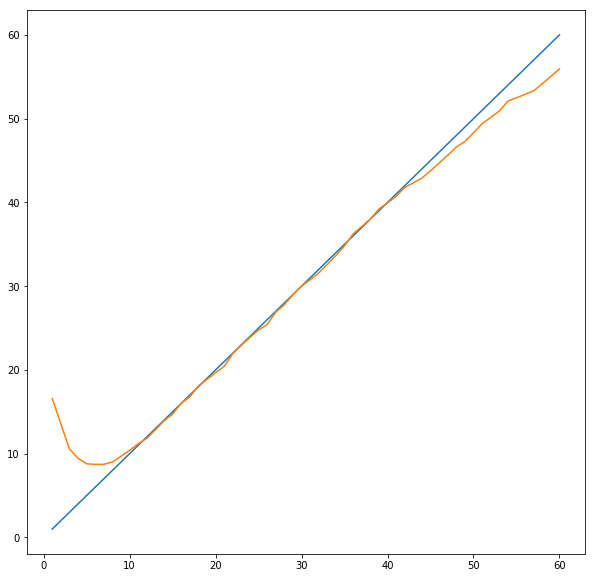

In [5]:
plot_calibration_data(final_eight_bits, final_eight_bits)
plot_distances(new_calibration)

In [6]:
from scipy.optimize import curve_fit
import math

def func(x, a, b, c):
    return ((x ** c) / a) ** (1 / -b)

def inverse_func(y, a, b, c):
    return (a / (y ** b)) ** (1 / c)

ys = final_eight_bits[10:]

xs = [i for i in range(10, len(final_eight_bits))]

popt, pcov = curve_fit(func, xs, ys)

[1.55066917e+04 1.19824055e+00 8.31810760e-01]
22.943323508332583
367.55801325254


/Users/ainsley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


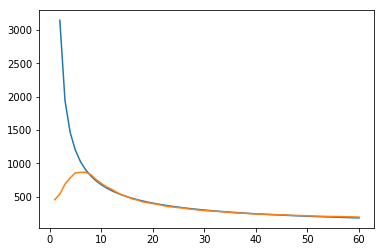

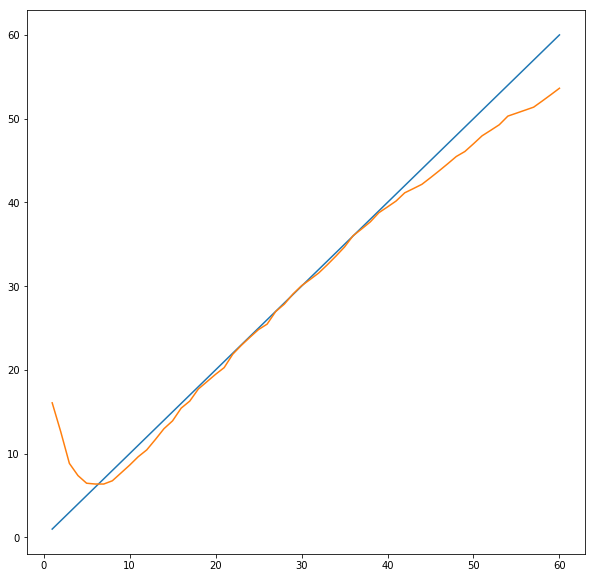

In [7]:
print(popt)
print(inverse_func(final_eight_bits[22], *popt))
print(func(22, *popt))
fitted_xs = [inverse_func(x, *popt) for x in final_eight_bits]

plot_calibration_data(func([i for i in range(len(final_eight_bits))], *popt), final_eight_bits)

plot_distances(fitted_xs)